# Feature Engineering and Selection

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-модулей" data-toc-modified-id="Импорт-модулей-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт модулей</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Создание-новых-признаков" data-toc-modified-id="Создание-новых-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Создание новых признаков</a></span><ul class="toc-item"><li><span><a href="#Title" data-toc-modified-id="Title-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><code>Title</code></a></span></li><li><span><a href="#Удаление-PassengerId-и-Name" data-toc-modified-id="Удаление-PassengerId-и-Name-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Удаление <code>PassengerId</code> и <code>Name</code></a></span></li><li><span><a href="#Индикатор-пропуска-для-Age-и-Cabin" data-toc-modified-id="Индикатор-пропуска-для-Age-и-Cabin-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Индикатор пропуска для <code>Age</code> и <code>Cabin</code></a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Добавление-логарифмов-признаков-Age,-Fare" data-toc-modified-id="Добавление-логарифмов-признаков-Age,-Fare-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Добавление логарифмов признаков <code>Age</code>, <code>Fare</code></a></span></li><li><span><a href="#Дискретизация-количественных-признаков" data-toc-modified-id="Дискретизация-количественных-признаков-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Дискретизация количественных признаков</a></span></li><li><span><a href="#Вычисление-статистик-для-категориальных-переменных" data-toc-modified-id="Вычисление-статистик-для-категориальных-переменных-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Вычисление статистик для категориальных переменных</a></span></li></ul></li></ul></div>

## Импорт модулей

In [1]:
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.imputation import AddMissingIndicator, RandomSampleImputer
from feature_engine.transformation import LogCpTransformer

from joblib import load
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import FunctionTransformer

sklearn.set_config(transform_output="pandas")

%matplotlib inline

## Загрузка данных

In [2]:
X_train, y_train = load("train_set.joblib")

## Создание новых признаков

In [3]:
X_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            137
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          552
Embarked         2
dtype: int64

In [4]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
692,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
527,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S


### `Title`

In [5]:
def add_title(X, y=None, group_rare=True):
    title = X.Name.str.extract(pat=r"\b,\s(.+?)\.\s[\b(]?")
    title = pd.Series(title[0], name="Title").str.lower()

    if group_rare:
        title = title.where(
            title.isin(["mr", "miss", "mrs", "master"]), "aristocratic"
        )

    return pd.concat([X, title], axis="columns")

title_adder = FunctionTransformer(add_title)


X_train = title_adder.fit_transform(X_train)
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
692,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,mr
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,mr
527,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,mr
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,mrs
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,mrs


### Удаление `PassengerId` и `Name`

In [6]:
title_adder = FunctionTransformer(
    lambda x: x.drop(columns=['PassengerId', 'Name'])
)

X_train = title_adder.fit_transform(X_train)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
692,3,male,NaN,0,0,1601,56.4958,NaN,S,mr
481,2,male,NaN,0,0,239854,0.0000,NaN,S,mr
527,1,male,NaN,0,0,PC 17483,221.7792,C95,S,mr
855,3,female,18.0,0,1,392091,9.3500,NaN,S,mrs
801,2,female,31.0,1,1,C.A. 31921,26.2500,NaN,S,mrs


### Индикатор пропуска для `Age` и `Cabin`

In [7]:
missing_indicator = AddMissingIndicator(
    variables=['Age', 'Cabin']
)

X_train = missing_indicator.fit_transform(X_train)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_na,Cabin_na
692,3,male,NaN,0,0,1601,56.4958,NaN,S,mr,1,1
481,2,male,NaN,0,0,239854,0.0000,NaN,S,mr,1,1
527,1,male,NaN,0,0,PC 17483,221.7792,C95,S,mr,1,0
855,3,female,18.0,0,1,392091,9.3500,NaN,S,mrs,0,1
801,2,female,31.0,1,1,C.A. 31921,26.2500,NaN,S,mrs,0,1


### Заполнение пропусков

In [8]:
random_imputer = RandomSampleImputer(
    variables=['Age', 'Embarked']
)

X_train = random_imputer.fit_transform(X_train)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_na,Cabin_na
692,3,male,40.0,0,0,1601,56.4958,NaN,S,mr,1,1
481,2,male,6.0,0,0,239854,0.0000,NaN,S,mr,1,1
527,1,male,29.0,0,0,PC 17483,221.7792,C95,S,mr,1,0
855,3,female,18.0,0,1,392091,9.3500,NaN,S,mrs,0,1
801,2,female,31.0,1,1,C.A. 31921,26.2500,NaN,S,mrs,0,1


In [9]:
cabin_imputer = FunctionTransformer(
    lambda x: x.assign(Cabin=lambda x: x.Cabin.fillna('unknown'))
)

X_train = cabin_imputer.fit_transform(X_train)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_na,Cabin_na
692,3,male,40.0,0,0,1601,56.4958,unknown,S,mr,1,1
481,2,male,6.0,0,0,239854,0.0000,unknown,S,mr,1,1
527,1,male,29.0,0,0,PC 17483,221.7792,C95,S,mr,1,0
855,3,female,18.0,0,1,392091,9.3500,unknown,S,mrs,0,1
801,2,female,31.0,1,1,C.A. 31921,26.2500,unknown,S,mrs,0,1


### Добавление логарифмов признаков `Age`, `Fare`

In [10]:
log_cp_tr = LogCpTransformer(variables = ['Age', 'Fare'], C='auto')

X_train[['Age_log', 'Fare_log']] = log_cp_tr.fit_transform(X_train[['Age', 'Fare']])
print(log_cp_tr.C_)
X_train.head()

{'Age': 1.42, 'Fare': 1.0}


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_na,Cabin_na,Age_log,Fare_log
692,3,male,40.0,0,0,1601,56.4958,unknown,S,mr,1,1,3.723764,4.051712
481,2,male,6.0,0,0,239854,0.0000,unknown,S,mr,1,1,2.004179,0.000000
527,1,male,29.0,0,0,PC 17483,221.7792,C95,S,mr,1,0,3.415100,5.406181
855,3,female,18.0,0,1,392091,9.3500,unknown,S,mrs,0,1,2.966303,2.336987
801,2,female,31.0,1,1,C.A. 31921,26.2500,unknown,S,mrs,0,1,3.478776,3.305054


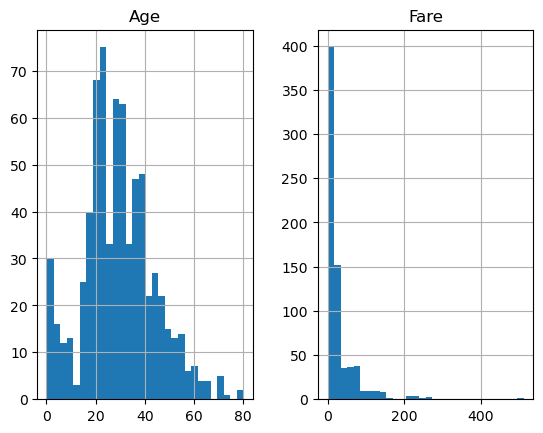

In [11]:
X_train[['Age', 'Fare']].hist(bins=30)
plt.show()

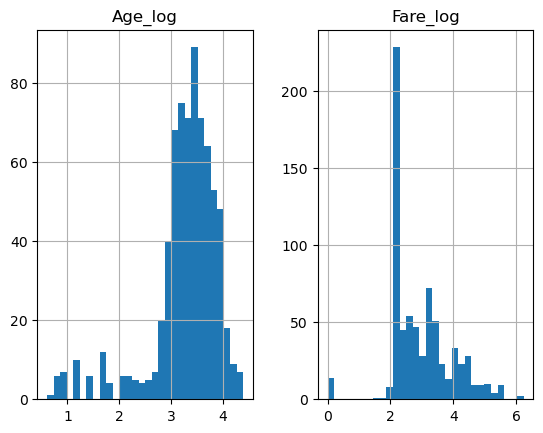

In [12]:
X_train[['Age_log', 'Fare_log']].hist(bins=30)
plt.show()

### Дискретизация количественных признаков

In [14]:
discretizer = EqualFrequencyDiscretiser(q=10)

cols_for_discretization = ['Age', 'Fare', 'Age_log', 'Fare_log']
new_names = [col + '_discr' for col in cols_for_discretization]

X_train[new_names] = discretizer.fit_transform(X_train[cols_for_discretization])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_na,Cabin_na,Age_log,Fare_log,Age_discr,Fare_discr,Age_log_discr,Fare_log_discr
692,3,male,40.0,0,0,1601,56.4958,unknown,S,mr,1,1,3.723764,4.051712,7,8,7,8
481,2,male,6.0,0,0,239854,0.0000,unknown,S,mr,1,1,2.004179,0.000000,0,0,0,0
527,1,male,29.0,0,0,PC 17483,221.7792,C95,S,mr,1,0,3.415100,5.406181,4,9,4,9
855,3,female,18.0,0,1,392091,9.3500,unknown,S,mrs,0,1,2.966303,2.336987,1,3,1,3
801,2,female,31.0,1,1,C.A. 31921,26.2500,unknown,S,mrs,0,1,3.478776,3.305054,5,6,5,6


### Вычисление статистик для категориальных переменных

In [15]:
def count_stats(X, y=None, cat_features=None, num_features=None, func=None):
    if cat_features is None:
        cat_cols = X.select_dtypes(include='object').columns
    else:
        cat_cols = cat_features
    
    if num_features is None:
        num_cols = X.select_dtypes(exclude='object').columns
    else:
        num_cols = num_features
        
    if func is None:
        stats = ['mean']
    else:
        stats = list(func)
        
        
    res = X.copy()
    
    for cat in cat_cols:
        for stat in stats:
            name = [f"{stat}_{num_col}_by_{cat}" for num_col in num_cols]
            res[name] = (
                X
                .groupby(by=cat)
                [num_cols]
                .transform(stat)
            )
    
    return res

In [16]:
count_stats(
    X_train, 
    cat_features=['Pclass', 'Sex', 'Title'], 
    num_features=['Age', 'Fare'],
).head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,...,Age_discr,Fare_discr,Age_log_discr,Fare_log_discr,mean_Age_by_Pclass,mean_Fare_by_Pclass,mean_Age_by_Sex,mean_Fare_by_Sex,mean_Age_by_Title,mean_Fare_by_Title
692,3,male,40.0,0,0,1601,56.4958,unknown,S,mr,...,7,8,7,8,25.941176,13.660751,30.318083,24.439677,31.469248,23.452982
481,2,male,6.0,0,0,239854,0.0000,unknown,S,mr,...,0,0,0,0,29.792200,20.810139,30.318083,24.439677,31.469248,23.452982
527,1,male,29.0,0,0,PC 17483,221.7792,C95,S,mr,...,4,9,4,9,37.388421,82.999075,30.318083,24.439677,31.469248,23.452982
855,3,female,18.0,0,1,392091,9.3500,unknown,S,mrs,...,1,3,1,3,25.941176,13.660751,28.020751,45.209109,35.271028,47.532593
801,2,female,31.0,1,1,C.A. 31921,26.2500,unknown,S,mrs,...,5,6,5,6,29.792200,20.810139,28.020751,45.209109,35.271028,47.532593
